In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import math

In [3]:
patient_df = pd.read_csv('DATA/patient.csv')
time_df = pd.read_csv('DATA/time.csv')
route_df = pd.read_csv('DATA/route.csv')

In [4]:
patient_df.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [5]:
patient_df.columns

Index(['patient_id', 'sex', 'birth_year', 'country', 'region', 'disease',
       'group', 'infection_reason', 'infection_order', 'infected_by',
       'contact_number', 'confirmed_date', 'released_date', 'deceased_date',
       'state'],
      dtype='object')

In [6]:
patient_df['birth_year'].shape

(7754,)

In [7]:
patient_df['birth_year'] = patient_df.birth_year.fillna(0.0).astype(int)

In [8]:
patient_df['birth_year'].unique

<bound method Series.unique of 0       1984
1       1964
2       1966
3       1964
4       1987
        ... 
7749       0
7750       0
7751       0
7752       0
7753       0
Name: birth_year, Length: 7754, dtype: int32>

In [9]:
patient_df['birth_year'] = patient_df['birth_year'].map(lambda val: val if val > 0 else np.nan)

In [10]:
patient_df['confirmed_date']

0       2020-01-20
1       2020-01-24
2       2020-01-26
3       2020-01-27
4       2020-01-30
           ...    
7749    2020-03-10
7750    2020-03-10
7751    2020-03-10
7752    2020-03-10
7753    2020-03-10
Name: confirmed_date, Length: 7754, dtype: object

In [11]:
patient_df.confirmed_date = pd.to_datetime(patient_df.confirmed_date)

In [12]:
patient_df.confirmed_date

0      2020-01-20
1      2020-01-24
2      2020-01-26
3      2020-01-27
4      2020-01-30
          ...    
7749   2020-03-10
7750   2020-03-10
7751   2020-03-10
7752   2020-03-10
7753   2020-03-10
Name: confirmed_date, Length: 7754, dtype: datetime64[ns]

In [13]:
count_id = patient_df.groupby(patient_df.confirmed_date).patient_id.count()

In [14]:
count_id

confirmed_date
2020-01-20       1
2020-01-24       1
2020-01-26       1
2020-01-27       1
2020-01-30       3
2020-01-31       4
2020-02-01       1
2020-02-02       3
2020-02-04       1
2020-02-05       5
2020-02-06       3
2020-02-09       3
2020-02-10       1
2020-02-16       2
2020-02-18       8
2020-02-19      27
2020-02-20      38
2020-02-21     100
2020-02-22     229
2020-02-23     169
2020-02-24     231
2020-02-25     143
2020-02-26     287
2020-02-27     504
2020-02-28     571
2020-02-29     812
2020-03-01    1062
2020-03-02     600
2020-03-03     516
2020-03-04     438
2020-03-05     518
2020-03-06     483
2020-03-07     367
2020-03-08     248
2020-03-09     131
2020-03-10     242
Name: patient_id, dtype: int64

In [15]:
count_id.head()

confirmed_date
2020-01-20    1
2020-01-24    1
2020-01-26    1
2020-01-27    1
2020-01-30    3
Name: patient_id, dtype: int64

In [16]:
count_id.tail()

confirmed_date
2020-03-06    483
2020-03-07    367
2020-03-08    248
2020-03-09    131
2020-03-10    242
Name: patient_id, dtype: int64

In [17]:
accumulated_count = count_id.cumsum()

In [18]:
accumulated_count

confirmed_date
2020-01-20       1
2020-01-24       2
2020-01-26       3
2020-01-27       4
2020-01-30       7
2020-01-31      11
2020-02-01      12
2020-02-02      15
2020-02-04      16
2020-02-05      21
2020-02-06      24
2020-02-09      27
2020-02-10      28
2020-02-16      30
2020-02-18      38
2020-02-19      65
2020-02-20     103
2020-02-21     203
2020-02-22     432
2020-02-23     601
2020-02-24     832
2020-02-25     975
2020-02-26    1262
2020-02-27    1766
2020-02-28    2337
2020-02-29    3149
2020-03-01    4211
2020-03-02    4811
2020-03-03    5327
2020-03-04    5765
2020-03-05    6283
2020-03-06    6766
2020-03-07    7133
2020-03-08    7381
2020-03-09    7512
2020-03-10    7754
Name: patient_id, dtype: int64

In [19]:
import datetime

In [20]:
now = datetime.datetime.now()

In [21]:
now.year

2020

In [22]:
patient_df['age'] = now.year - patient_df['birth_year']

In [23]:
patient_df.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0


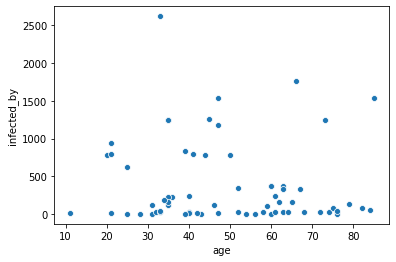

In [24]:
sns.scatterplot(x='age', y='infected_by', data=patient_df)

In [25]:
def group_age(age):
    if age >= 0:
        if age%10 != 0:
            lower = int(math.floor(age/10.0))*10
            upper = int(math.ceil(age/10.0))*10-1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age+9)
            return f"{lower}-{upper}"
        return np.nan

In [26]:
group_age(15)

'10-19'

In [27]:
patient_df['age_range'] = patient_df['age'].apply(group_age)

In [28]:
patient_df.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,age_range
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0,30-39
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0,50-59
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0,50-59
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0,50-59
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0,30-39


In [29]:
age_order = patient_df['age_range'].unique()

In [30]:
age_order

array(['30-39', '50-59', '20-29', '60-69', '40-49', '70-79', '80-89',
       '10-19', None, '0-9', '90-99'], dtype=object)

In [31]:
age_order = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89',
       '90-99']

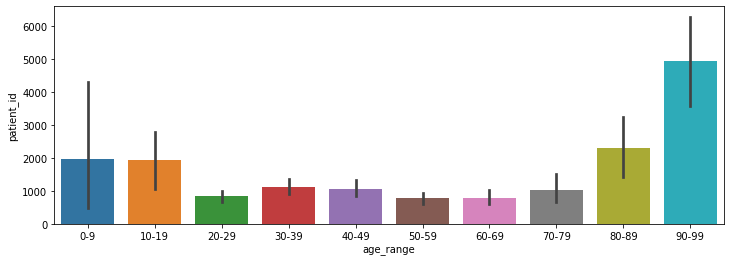

In [32]:
plt.figure(figsize=(12,4))
sns.barplot(x='age_range',y='patient_id',data=patient_df,order=age_order)

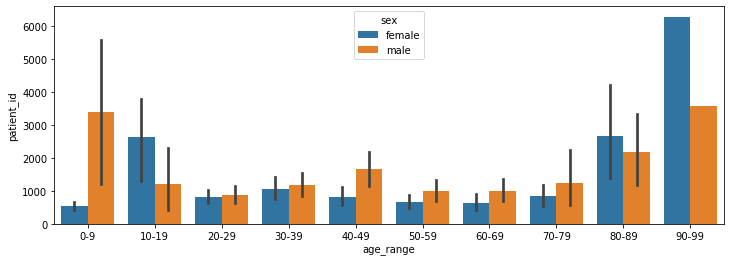

In [33]:
plt.figure(figsize=(12,4))
sns.barplot(x='age_range',y='patient_id', hue='sex', data=patient_df,order=age_order)

In [34]:
patient_df[patient_df['sex'] == 'female']['patient_id'].count()

393

In [35]:
patient_df[patient_df['sex'] == 'male'].count()

patient_id          285
sex                 285
birth_year          280
country             285
region              216
disease              21
group                35
infection_reason     79
infection_order      21
infected_by          33
contact_number       29
confirmed_date      285
released_date        28
deceased_date        25
state               285
age                 280
age_range           280
dtype: int64

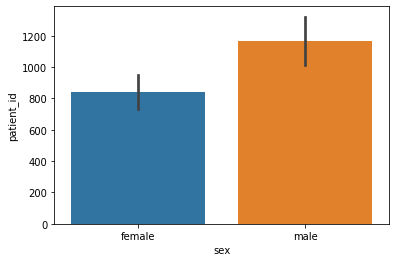

In [36]:
sns.barplot(x='sex', y='patient_id', data=patient_df)

In [37]:
time_df.head()

,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,...,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
time_df['confirmed']

0        1
1        1
2        1
3        1
4        2
5        2
6        3
7        4
8        4
9        4
10       6
11      11
12      12
13      15
14      15
15      16
16      18
17      23
18      24
19      24
20      27
21      27
22      28
23      28
24      28
25      28
26      28
27      29
28      30
29      31
30      51
31     104
32     204
33     433
34     602
35     833
36     977
37    1261
38    1766
39    2337
40    3150
41    3736
42    4212
43    4812
44    5328
45    5766
46    6284
47    6767
48    7134
49    7382
50    7513
51    7755
Name: confirmed, dtype: int64

In [39]:
patient =patient_df

In [40]:
column_date = ['confirmed_date','released_date','deceased_date']

In [41]:
for col in column_date:
    patient[col] = pd.to_datetime(patient[col])

In [42]:
patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,age_range
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0,30-39
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0,50-59
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0,50-59
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0,50-59
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0,30-39


In [43]:
patient['released_date']

0      2020-02-06
1      2020-02-05
2      2020-02-12
3      2020-02-09
4      2020-03-02
          ...    
7749          NaT
7750          NaT
7751          NaT
7752          NaT
7753          NaT
Name: released_date, Length: 7754, dtype: datetime64[ns]

In [44]:
patient['time_to_release'] = patient['released_date'] - patient['confirmed_date']
patient['time_to_death'] = patient['deceased_date'] - patient['confirmed_date']
patient['duration'] = patient[['time_to_release','time_to_death']].min(axis=1)
patient['duration_days'] = patient['duration'].dt.days

In [45]:
range_of_age = sorted(set([ar for ar in patient['age_range'] if ar != None]))

In [46]:
patient['state_by_gender'] = patient['state'] + '_' + patient['sex']

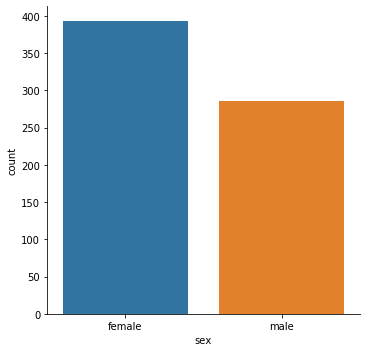

In [47]:
sns.catplot(x='sex', kind='count', data=patient)

In [48]:
infection_reason = ['visit to Wuhan', 'contact with patient',
       'contact with patient in Japan', 'residence in Wuhan',
       'visit to Thailand', 'contact with patient in Singapore',
       'visit to China', 'visit to Daegu', 'pilgrimage to Israel',
       'contact with patient in Daegu', 'visit to Vietnam',
       'visit to Japan', 'visit to Italy', 'visit to ooo']

In [49]:
numerical_infection = []

for i in infection_reason:
    numeric = patient_df[patient_df['infection_reason'] == i]['patient_id'].count()
    numerical_infection.append(numeric)

In [50]:
numerical_infection

[8, 76, 1, 2, 2, 2, 2, 50, 6, 1, 1, 1, 1, 1]

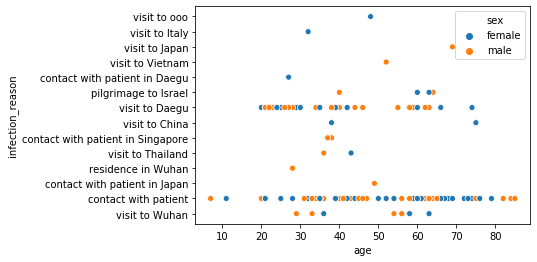

In [51]:
sns.scatterplot(x='age', y='infection_reason', hue='sex', data=patient_df)

<BarContainer object of 14 artists>

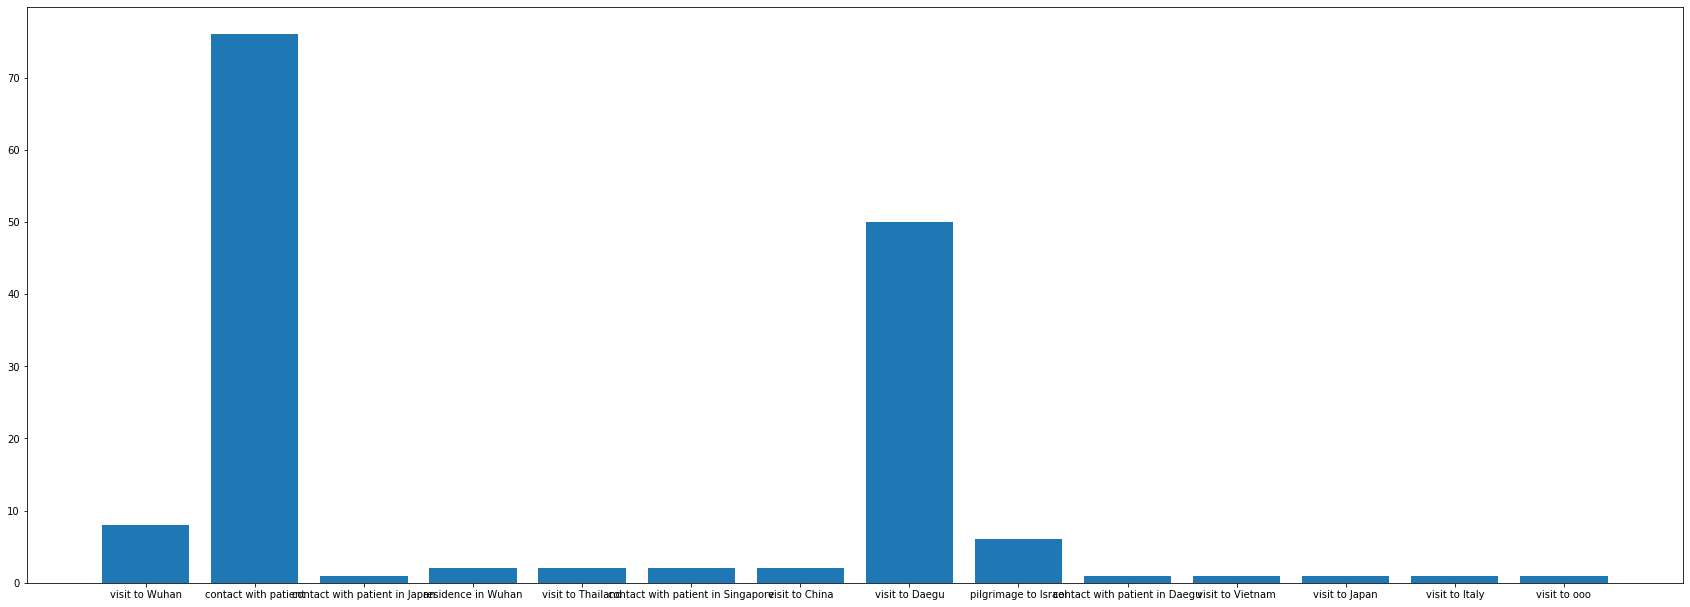

In [107]:
fig = plt.figure(figsize=(23,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(patient_df['infection_reason'].dropna().unique(), numerical_infection)

In [53]:
released = patient_df[patient_df.state == 'released']
isolated = patient_df[patient_df.state == 'isolated']
dead = patient_df[patient_df.state == 'deceased']

Text(0.5, 1.0, 'Confirmed Case')

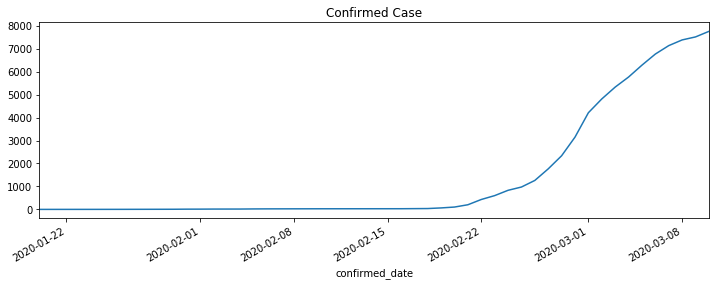

In [54]:
plt.figure(figsize=(12,4))
accumulated_count.plot()
plt.title('Confirmed Case')

In [55]:
route_df.head()

,patient_id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [56]:
data = count_id.resample('D').first().fillna(0).cumsum()
data = data[10:]

In [57]:
data

confirmed_date
2020-01-30       7.0
2020-01-31      11.0
2020-02-01      12.0
2020-02-02      15.0
2020-02-03      15.0
2020-02-04      16.0
2020-02-05      21.0
2020-02-06      24.0
2020-02-07      24.0
2020-02-08      24.0
2020-02-09      27.0
2020-02-10      28.0
2020-02-11      28.0
2020-02-12      28.0
2020-02-13      28.0
2020-02-14      28.0
2020-02-15      28.0
2020-02-16      30.0
2020-02-17      30.0
2020-02-18      38.0
2020-02-19      65.0
2020-02-20     103.0
2020-02-21     203.0
2020-02-22     432.0
2020-02-23     601.0
2020-02-24     832.0
2020-02-25     975.0
2020-02-26    1262.0
2020-02-27    1766.0
2020-02-28    2337.0
2020-02-29    3149.0
2020-03-01    4211.0
2020-03-02    4811.0
2020-03-03    5327.0
2020-03-04    5765.0
2020-03-05    6283.0
2020-03-06    6766.0
2020-03-07    7133.0
2020-03-08    7381.0
2020-03-09    7512.0
2020-03-10    7754.0
Freq: D, Name: patient_id, dtype: float64

In [58]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 22 columns):
patient_id          7754 non-null int64
sex                 678 non-null object
birth_year          665 non-null float64
country             7754 non-null object
region              436 non-null object
disease             28 non-null float64
group               86 non-null object
infection_reason    154 non-null object
infection_order     36 non-null float64
infected_by         70 non-null float64
contact_number      53 non-null float64
confirmed_date      7754 non-null datetime64[ns]
released_date       55 non-null datetime64[ns]
deceased_date       36 non-null datetime64[ns]
state               7754 non-null object
age                 665 non-null float64
age_range           665 non-null object
time_to_release     55 non-null timedelta64[ns]
time_to_death       36 non-null timedelta64[ns]
duration            91 non-null timedelta64[ns]
duration_days       91 non-null float64
sta

In [59]:
patient['disease'] = patient['disease'].map(lambda val: val if val == 1 else 0)

In [60]:
patient = patient.where(pd.notnull(patient), None)

In [61]:
patient['group'] = patient['group'].map(lambda val: val if val != None else 'Unknown')

In [62]:
patient['group'].unique()

array(['Unknown', 'Shincheonji Church', 'Cheongdo Daenam Hospital',
       "Eunpyeong St. Mary's Hospital", 'Pilgrimage'], dtype=object)

In [63]:
patient['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
7749      None
7750      None
7751      None
7752      None
7753      None
Name: sex, Length: 7754, dtype: object

In [64]:
patient['sex'] = patient['sex'].map(lambda val: val if val != None else 'Unknown')

In [65]:
patient['sex'].unique()

array(['female', 'male', 'Unknown'], dtype=object)

In [66]:
sex_count = [patient[patient['sex'] == 'male']['sex'].count(), patient[patient['sex'] == 'female']['sex'].count(), patient[patient['sex'] == 'Unknown']['sex'].count()]

In [67]:
sex_count

[285, 393, 7076]

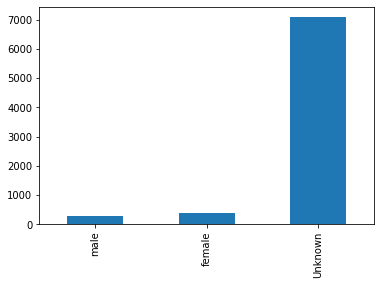

In [68]:
patient.sex.value_counts().sort_values().plot(kind = 'bar')

In [69]:
patient[patient['group'] == 'Unknown']['group'].count()

7668

In [70]:
patient[patient['group'] != 'Unknown']['group'].count()

86

In [71]:
patient = patient.drop('group', axis=1)

In [72]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 21 columns):
patient_id          7754 non-null int64
sex                 7754 non-null object
birth_year          665 non-null object
country             7754 non-null object
region              436 non-null object
disease             7754 non-null object
infection_reason    154 non-null object
infection_order     36 non-null object
infected_by         70 non-null object
contact_number      53 non-null object
confirmed_date      7754 non-null datetime64[ns]
released_date       55 non-null datetime64[ns]
deceased_date       36 non-null datetime64[ns]
state               7754 non-null object
age                 665 non-null object
age_range           665 non-null object
time_to_release     55 non-null timedelta64[ns]
time_to_death       36 non-null timedelta64[ns]
duration            91 non-null timedelta64[ns]
duration_days       91 non-null object
state_by_gender     678 non-null object
dtypes

In [73]:
patient['infection_reason'] = patient['infection_reason'].map(lambda val: val if val != None else 'Unknown')

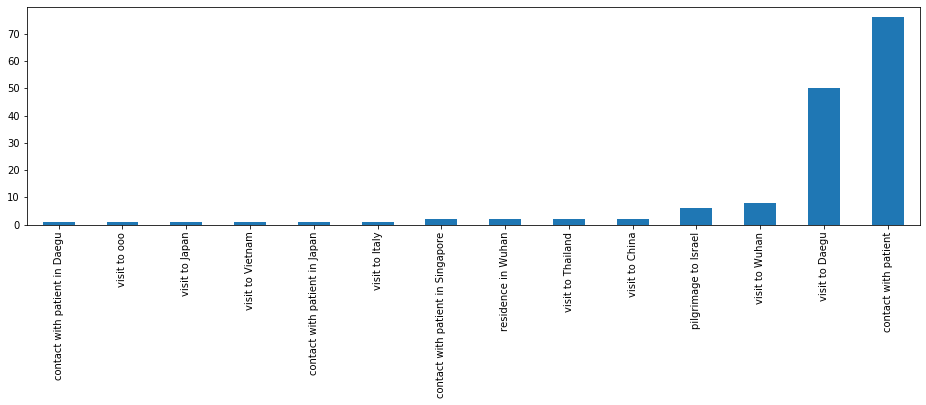

In [74]:
plt.figure(figsize=(16,4))
patient[patient['infection_reason'] != 'Unknown'].infection_reason.value_counts().sort_values().plot(kind = 'bar')

In [75]:
patient['infection_reason'].unique()

array(['visit to Wuhan', 'contact with patient',
       'contact with patient in Japan', 'residence in Wuhan',
       'visit to Thailand', 'contact with patient in Singapore',
       'visit to China', 'Unknown', 'visit to Daegu',
       'pilgrimage to Israel', 'contact with patient in Daegu',
       'visit to Vietnam', 'visit to Japan', 'visit to Italy',
       'visit to ooo'], dtype=object)

In [76]:
patient[patient['infection_reason'] == 'visit to ooo']['infection_reason'].count()

1

In [78]:
time_df.head()

,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,...,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [108]:
patient_df

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,...,released_date,deceased_date,state,age,age_range,time_to_release,time_to_death,duration,duration_days,state_by_gender
0,1,female,1984.0,China,filtered at airport,0.0,NaN,visit to Wuhan,1.0,NaN,...,2020-02-06,NaT,released,36.0,30-39,17 days,NaT,17 days,17.0,released_female
1,2,male,1964.0,Korea,filtered at airport,0.0,NaN,visit to Wuhan,1.0,NaN,...,2020-02-05,NaT,released,56.0,50-59,12 days,NaT,12 days,12.0,released_male
2,3,male,1966.0,Korea,capital area,0.0,NaN,visit to Wuhan,1.0,NaN,...,2020-02-12,NaT,released,54.0,50-59,17 days,NaT,17 days,17.0,released_male
3,4,male,1964.0,Korea,capital area,0.0,NaN,visit to Wuhan,1.0,NaN,...,2020-02-09,NaT,released,56.0,50-59,13 days,NaT,13 days,13.0,released_male
4,5,male,1987.0,Korea,capital area,0.0,NaN,visit to Wuhan,1.0,NaN,...,2020-03-02,NaT,released,33.0,30-39,32 days,NaT,32 days,32.0,released_male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7749,7751,NaN,NaN,Korea,NaN,0.0,NaN,NaN,NaN,NaN,...,NaT,NaT,isolated,NaN,None,NaT,NaT,NaT,NaN,NaN
7750,7752,NaN,NaN,Korea,NaN,0.0,NaN,NaN,NaN,NaN,...,NaT,NaT,isolated,NaN,None,NaT,NaT,NaT,NaN,NaN
7751,7753,NaN,NaN,Korea,NaN,0.0,NaN,NaN,NaN,NaN,...,NaT,NaT,isolated,NaN,None,NaT,NaT,NaT,NaN,NaN
7752,7754,NaN,NaN,Korea,NaN,0.0,NaN,NaN,NaN,NaN,...,NaT,NaT,isolated,NaN,None,NaT,NaT,NaT,NaN,NaN


In [79]:
time_confirm = pd.read_csv('DATA/covid_19_data.csv')

In [80]:
time_confirm = time_confirm[time_confirm['Country/Region']=='South Korea']

In [82]:
time_confirm = time_confirm.tail(16)

In [83]:
time_confirm.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
10818,10819,04/01/2020,NaN,South Korea,2020-04-01 22:04:58,9887.0,165.0,5567.0
11132,11133,04/02/2020,NaN,South Korea,4/2/20 8:53,9976.0,169.0,5828.0
11447,11448,04/03/2020,NaN,South Korea,2020-04-03 22:52:45,10062.0,174.0,6021.0
11762,11763,04/04/2020,NaN,South Korea,4/4/20 9:38,10156.0,177.0,6325.0
12078,12079,04/05/2020,NaN,South Korea,2020-04-05 23:13:44,10237.0,183.0,6463.0


Text(0.5, 1.0, 'Confirmed')

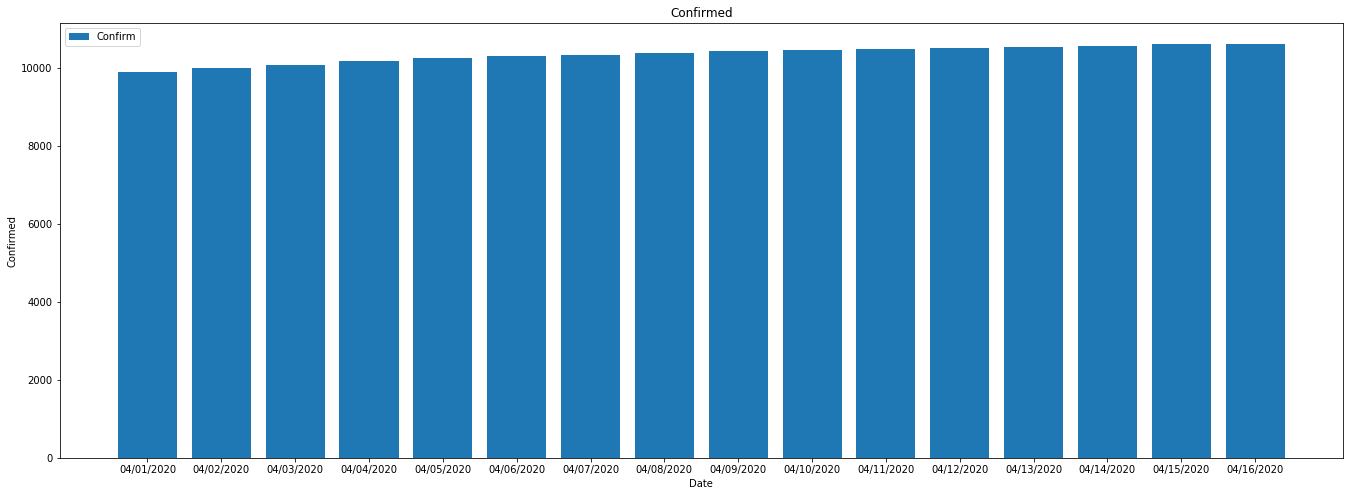

In [86]:
plt.figure(figsize=(23,8))
plt.bar(time_confirm.ObservationDate, time_confirm.Confirmed, label='Confirm')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.legend()
plt.title('Confirmed')

Text(0.5, 1.0, 'Deaths')

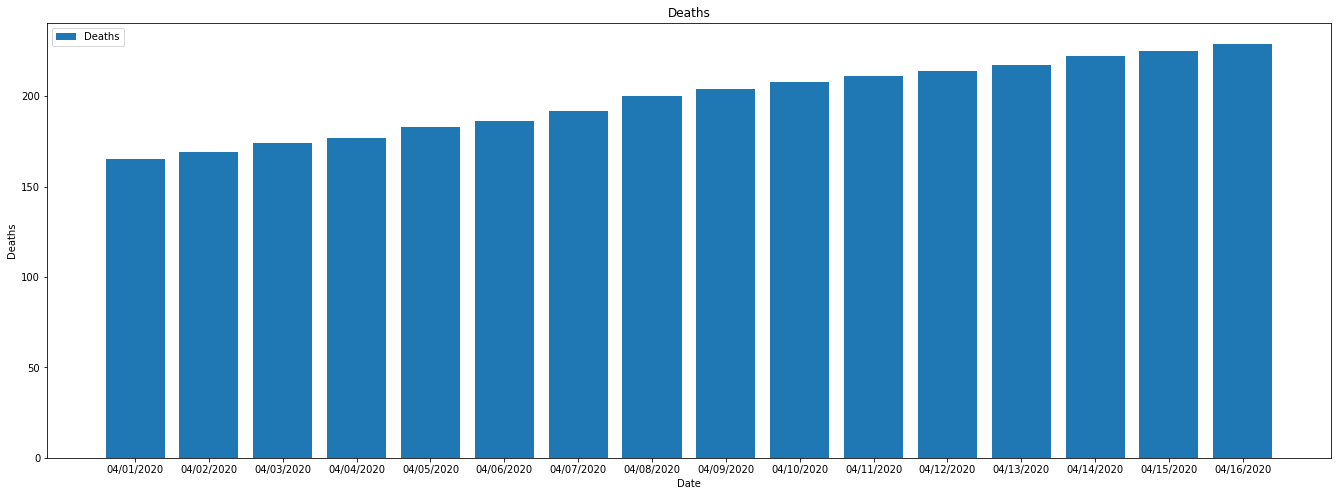

In [87]:
plt.figure(figsize=(23,8))
plt.bar(time_confirm.ObservationDate, time_confirm.Deaths, label='Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.title('Deaths')

Text(0.5, 1.0, 'Recovered')

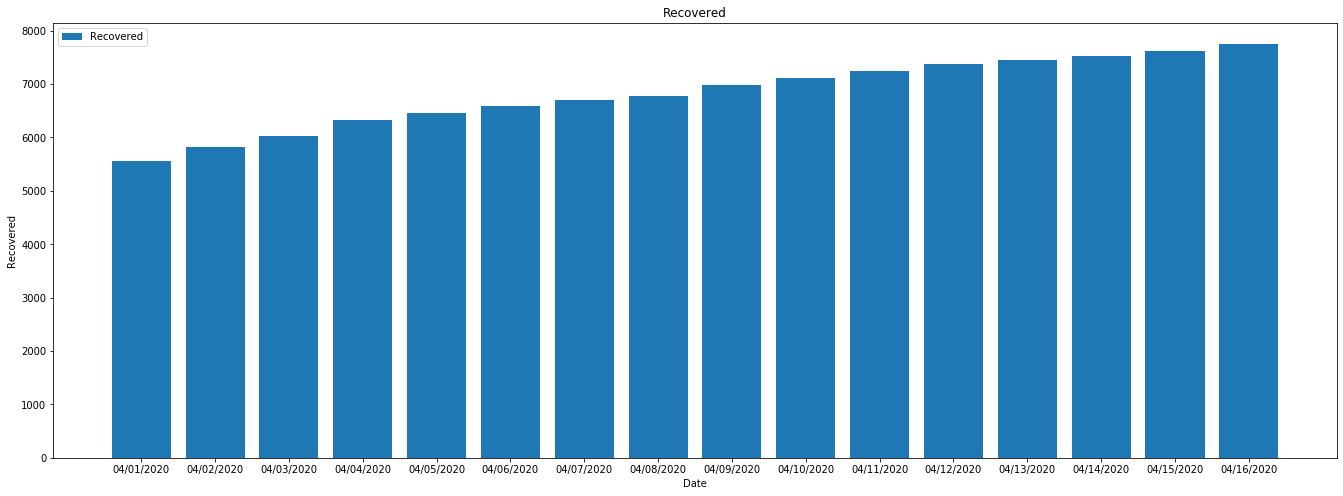

In [88]:
plt.figure(figsize=(23,8))
plt.bar(time_confirm.ObservationDate, time_confirm.Recovered, label='Recovered')
plt.xlabel('Date')
plt.ylabel('Recovered')
plt.legend()
plt.title('Recovered')

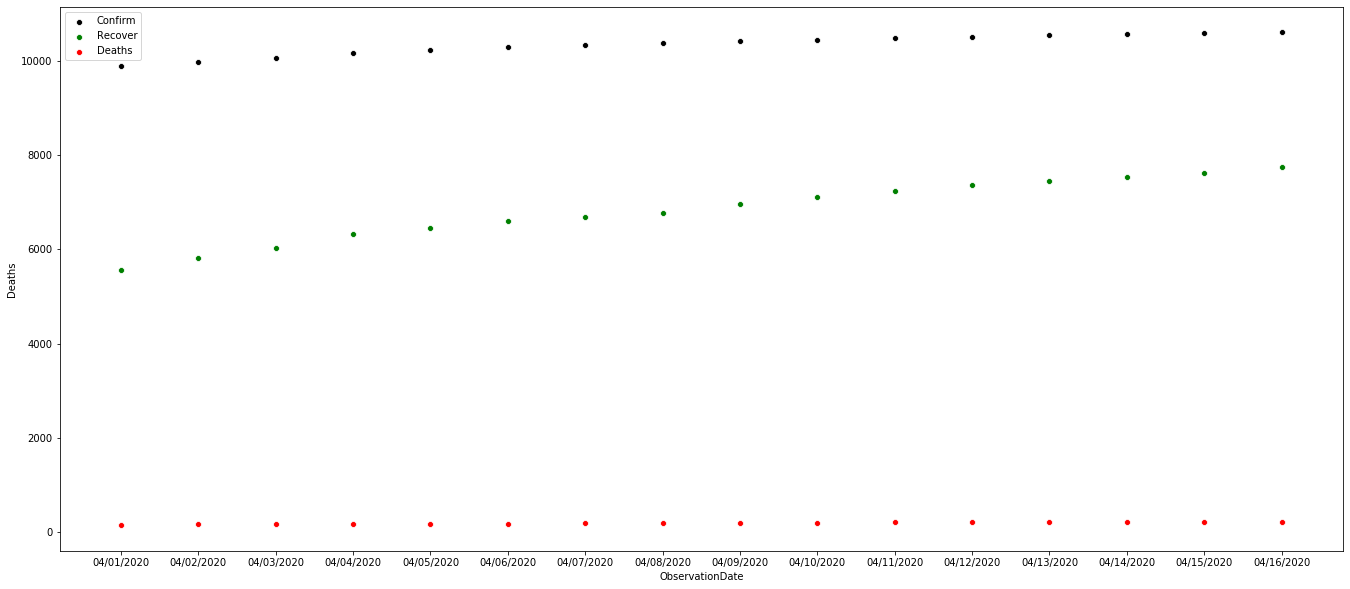

In [90]:
f, ax = plt.subplots(figsize=(23,10))
ax = sns.scatterplot(x='ObservationDate', y='Confirmed', data=time_confirm, color='black', label='Confirm')
ax = sns.scatterplot(x='ObservationDate', y='Recovered', data=time_confirm, color='green', label='Recover')
ax = sns.scatterplot(x='ObservationDate', y='Deaths', data=time_confirm, color='red', label='Deaths')

In [103]:
plt.figure(figsize=(23,10))
datas = [time_confirm['Confirmed'].max(), time_confirm['Recovered'].max(), time_confirm['Deaths'].max()]
datas
label = ['Confirmed','Recovered','Deaths']

<Figure size 1656x720 with 0 Axes>

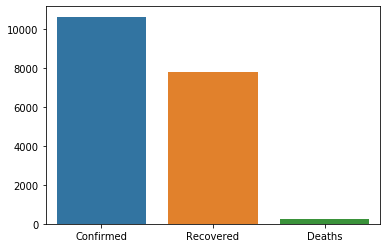

In [104]:
sns.barplot(x=label,y=datas)

In [105]:
datas

[10613.0, 7757.0, 229.0]